##Recommender System
The recommender system is used to recoomend the simlar movies to the users such that they can get movies recommended based on their ratings and other users ratings

## Import all libraries

In [ ]:
import pandas
import numpy
import os

In [ ]:
column_names = ["user_id", "movie_id", "ratings", "timestamp"]
df_ratings= pandas.read_csv("/content/drive/MyDrive/ml-latest-small/ratings.csv", names=column_names, skiprows=1)
df_ratings.head()
column_names_movies = ["movie_id", "title", "geners"]
df_movies = pandas.read_csv("/content/drive/MyDrive/ml-latest-small/movies.csv", names=column_names_movies, skiprows=1)
del df_movies["geners"]
df_movies.head()


,movie_id,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [ ]:
df = pandas.merge(df_ratings, df_movies, on="movie_id")
df.head()

,user_id,movie_id,ratings,timestamp,title
0,1,1,4.0,964982703,Toy Story (1995)
1,5,1,4.0,847434962,Toy Story (1995)
2,7,1,4.5,1106635946,Toy Story (1995)
3,15,1,2.5,1510577970,Toy Story (1995)
4,17,1,4.5,1305696483,Toy Story (1995)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sa
sa.set_style("white")
%matplotlib inline

In [ ]:
df.groupby("title")["ratings"].mean().sort_values(ascending=False).head()

title
Gena the Crocodile (1969)              5.0
True Stories (1986)                    5.0
Cosmic Scrat-tastrophe (2015)          5.0
Love and Pigeons (1985)                5.0
Red Sorghum (Hong gao liang) (1987)    5.0
Name: ratings, dtype: float64

In [ ]:
df.groupby("title")["ratings"].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: ratings, dtype: int64

In [ ]:
rating = pandas.DataFrame(df.groupby("title")["ratings"].mean())
rating.head()
rating["number_of_ratings"] = pandas.DataFrame(df.groupby("title")["ratings"].count())
rating.head()

,ratings,number_of_ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


## Visualizing all the data from the dataset to get a good perspective

<Axes: >

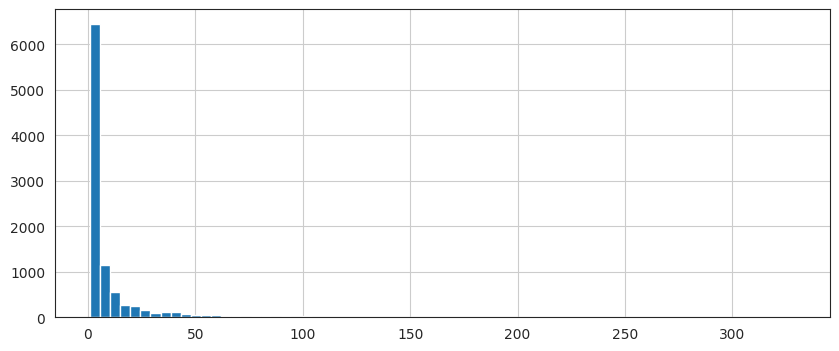

In [ ]:
plt.figure(figsize=(10,4))
rating["number_of_ratings"].hist(bins=70)

<Axes: >

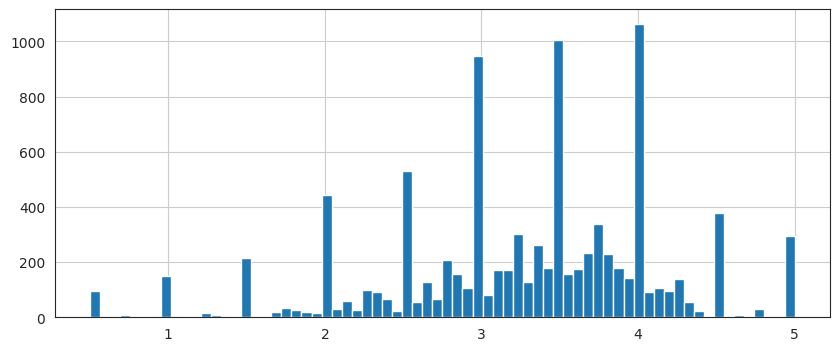

In [ ]:
plt.figure(figsize=(10,4))
rating["ratings"].hist(bins=70)

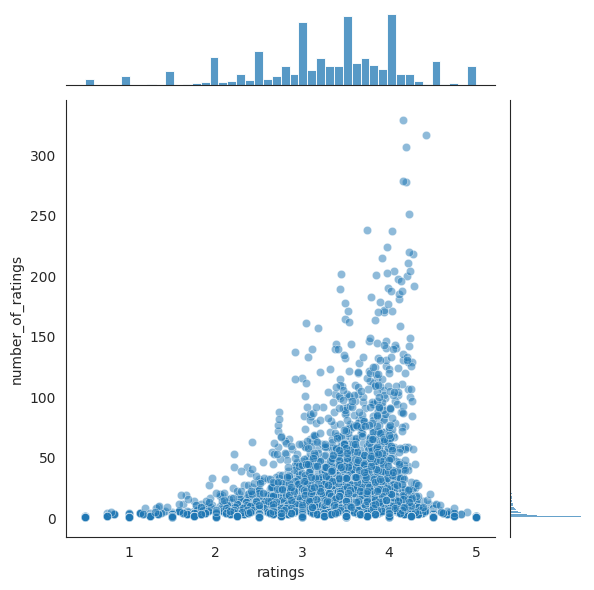

In [ ]:
sa.jointplot(x="ratings", y="number_of_ratings", data=rating, alpha=0.5)

In [ ]:
movie_matrix= df.pivot_table(index="user_id", columns="title", values="ratings")
movie_matrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
rating.sort_values("number_of_ratings", ascending=False).head(10)

,ratings,number_of_ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


### Building the Movie matrix aka the correlation matrix

In [ ]:
forest_grump_ratings=movie_matrix["Forrest Gump (1994)"]
forest_grump_ratings.head()

user_id
1    4.0
2    NaN
3    NaN
4    NaN
5    NaN
Name: Forrest Gump (1994), dtype: float64

In [ ]:
similar_to_forest_grump=movie_matrix.corrwith(forest_grump_ratings)
corr_forest_grump= pandas.DataFrame(similar_to_forest_grump, columns=["Correlation"])
corr_forest_grump.dropna(inplace=True)
corr_forest_grump.head()

/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
title,
"'burbs, The (1989)",0.197712
(500) Days of Summer (2009),0.234095
*batteries not included (1987),0.892710
...And Justice for All (1979),0.928571
10 Cent Pistol (2015),-1.000000


In [ ]:
corr_forest_grump.sort_values("Correlation", ascending=False).head(10)

,Correlation
title,
Lost & Found (1999),1.0
"Century of the Self, The (2002)",1.0
The 5th Wave (2016),1.0
Play Time (a.k.a. Playtime) (1967),1.0
Memories (Memorîzu) (1995),1.0
Playing God (1997),1.0
Killers (2010),1.0
"Girl Walks Home Alone at Night, A (2014)",1.0
Tampopo (1985),1.0


In [ ]:
corr_forest_grump= corr_forest_grump.join(rating["number_of_ratings"])
corr_forest_grump.head()

,Correlation,number_of_ratings
title,,
"'burbs, The (1989)",0.197712,17
(500) Days of Summer (2009),0.234095,42
*batteries not included (1987),0.892710,7
...And Justice for All (1979),0.928571,3
10 Cent Pistol (2015),-1.000000,2


In [ ]:
corr_forest_grump[corr_forest_grump["number_of_ratings"]> 100].sort_values("Correlation", ascending=False).head()

,Correlation,number_of_ratings
title,,
Forrest Gump (1994),1.000000,329
Good Will Hunting (1997),0.484042,141
Aladdin (1992),0.464268,183
American History X (1998),0.457287,129
"Truman Show, The (1998)",0.432556,125


### --------- End Of Correlation method ------------

## InCorporate Machine learning

In [ ]:
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp39-cp39-linux_x86_64.whl size=3195814 sha256=465614496092dfcf3fd07004e62615f9bfc2e168449e9ed19400dbd6ef2b5cfe
  Stored in directory: /root/.cache/pip/wheels/c6/3a/46/9b17b3512bdf283c6cb84f59929cdd5199d4e754d596d22784
Successfully built scikit-surprise


## Using SVD to recommend movies to a existing user

In [ ]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
import pandas, surprise
import pandas as pd


# Load the dataset of movies and their respective ratings
reader = Reader(rating_scale=(0.5, 5.0))
ratings= pandas.read_csv("/content/drive/MyDrive/ml-latest-small/ratings.csv")
movies = pandas.read_csv("/content/drive/MyDrive/ml-latest-small/movies.csv")
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

# Split the data into training and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Train an SVD model on the training set
model = SVD(n_factors=50, reg_all=0.1)
model.fit(trainset)

# Evaluate the model on the test set
predictions = model.test(testset)
accuracy = surprise.accuracy.rmse(predictions)
print('Model accuracy: {:.2f}'.format(accuracy))

# Use the model to recommend movies for a given user
user_id = 23
user_ratings = ratings[ratings['userId'] == user_id]
user_movies = set(user_ratings['movieId'])
all_movies = set(ratings['movieId'])
unseen_movies = list(all_movies - user_movies)
for movie in user_movies:
  movie_title = movies[movies['movieId'] == movie]['title'].values[0]
  print("-{}".format(movie_title))

predictions = []
for movie_id in unseen_movies:
    predictions.append(model.predict(user_id, movie_id))

recommended_movies = pd.DataFrame(predictions, columns=['uid', 'iid', 'r_ui', 'est', 'details'])
recommended_movies = recommended_movies.sort_values(by='r_ui', ascending=False)[:10]

print('Recommended movies for user {}:'.format(user_id))
for movie_id in recommended_movies['iid']:
    movie_title = movies[movies['movieId'] == movie_id]['title'].values[0]
    print('- {}'.format(movie_title))



RMSE: 0.8769
Model accuracy: 0.88
-Heat (1995)
-Die Hard (1988)
-Following (1998)
-Looking for Richard (1996)
-Blade Runner (1982)
-City of Lost Children, The (Cité des enfants perdus, La) (1995)
-Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
-Fisher King, The (1991)
-Maltese Falcon, The (a.k.a. Dangerous Female) (1931)
-Usual Suspects, The (1995)
-Monty Python's Life of Brian (1979)
-Postman, The (Postino, Il) (1994)
-Reservoir Dogs (1992)
-Once Upon a Time in China (Wong Fei Hung) (1991)
-L.A. Confidential (1997)
-Equus (1977)
-Fargo (1996)
-For a Few Dollars More (Per qualche dollaro in più) (1965)
-Titus (1999)
-Monty Python and the Holy Grail (1975)
-Triplets of Belleville, The (Les triplettes de Belleville) (2003)
-Red Violin, The (Violon rouge, Le) (1998)
-Memento (2000)
-Avalon (2001)
-Amores Perros (Love's a Bitch) (2000)
-Untouchables, The (1987)
-Professional, The (Le professionnel) (1981)
-Delicatessen (1991)
-Monty Python's The Meaning of Life (1983)
-Killing, The (1956)
-One 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install lightfm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.4/316.4 kB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lightfm: filename=lightfm-1.17-cp310-cp310-linux_x86_64.whl size=879183 sha256=33d4a00f17764b1953cc022035e07a6b2e62f26f830d70327a67db579ff9e631
  Stored in directory: /root/.cache/pip/wheels/4f/9b/7e/0b256f2168511d8fa4dae4fae0200fdbd729eb424a912ad636
Successfully built lightfm


### Building a recommender system for three other models to be compared against Warp, logistic and BPR

In [ ]:
import numpy as np
from lightfm import LightFM
from lightfm.evaluation import precision_at_k, recall_at_k
from lightfm.data import Dataset
from lightfm.cross_validation import random_train_test_split
from scipy.sparse import coo_matrix
import pandas as pd

# Load the ratings data
ratings = pd.read_csv('/content/drive/MyDrive/ml-latest-small/ratings.csv')
movies = pd.read_csv("/content/drive/MyDrive/ml-latest-small/movies.csv")


# Create the dataset object
dataset = Dataset()
dataset.fit(ratings['userId'], ratings['movieId'])

# Convert the ratings data to a sparse matrix
interactions = coo_matrix((ratings['rating'], (ratings['userId'], ratings['movieId'])))
interactions = interactions.tocsr()

# Split the data into train and test sets
train, test = random_train_test_split(interactions, test_percentage=0.2)

# Define the evaluation metric functions
def evaluate_model(model, train, test):
    train_precision = precision_at_k(model, train, k=5).mean()
    train_recall = recall_at_k(model, train, k=5).mean()
    test_precision = precision_at_k(model, test, k=5).mean()
    test_recall = recall_at_k(model, test, k=5).mean()
    # Calculate RMSE manually
    train_predictions = model.predict(train.row, train.col)
    train_rmse = np.sqrt(np.mean((train_predictions - train.data) ** 2))
    test_predictions = model.predict(test.row, test.col)
    test_rmse = np.sqrt(np.mean((test_predictions - test.data) ** 2))

    return train_precision, train_recall, test_precision, test_recall, train_rmse, test_rmse

# Train and evaluate multiple models
models = {
    'warp': LightFM(loss='warp'),
    'logistic': LightFM(loss='logistic'),
    'bpr': LightFM(loss='bpr'),
}

best_model = None
best_precision = 0.0

for model_name, model in models.items():
    model.fit(train, epochs=10)
    train_precision, train_recall, test_precision, test_recall,train_rmse, test_rmse = evaluate_model(model, train, test)
    
    print(f"Model: {model_name}")
    print("Train Precision:", train_precision)
    print("Train Recall:", train_recall)
    print("Test Precision:", test_precision)
    print("Test Recall:", test_recall)
    print("Train RMSE:", train_rmse)
    print("Test RMSE:", test_rmse)
    
    if test_precision > best_precision:
        best_model = model_name
        best_precision = test_precision
print(f"The Best Model is {best_model} Precsion :{best_precision}")

Model: warp
Train Precision: 0.3970492
Train Recall: 0.03263555570359702
Test Precision: 0.09589491
Test Recall: 0.025383253154932558
Train RMSE: 4.0585403
Test RMSE: 4.356398456688366
Model: logistic
Train Precision: 0.3918033
Train Recall: 0.03165997553166568
Test Precision: 0.10344828
Test Recall: 0.027905557566127618
Train RMSE: 1.4442754
Test RMSE: 1.4670441745719074
Model: bpr
Train Precision: 0.50786895
Train Recall: 0.043640815019850274
Test Precision: 0.07553366
Test Recall: 0.025166265541505896
Train RMSE: 8.281701
Test RMSE: 8.839198851256242
The Best Model is logistic Precsion :0.1034482792019844


## Getting the best model from the above (logistic) model to recommend movies to the user 

In [ ]:

def recommend_movies_for_user(user_id, model, k=10):
    # Get the known positive movies for the user
    known_positives = ratings[ratings['userId'] == user_id]['movieId']
    # Predict scores for all movies for the user
    scores = model.predict(user_id, np.arange(dataset.interactions_shape()[1]))
    # Sort the scores in descending order
    top_items = np.argsort(-scores)
    # Filter out the known positives and get the top k recommended movies
    recommended_movies = []
    for item_id in top_items:
        if item_id not in known_positives:
            movie_title = movies[movies['movieId'] == item_id]['title'].values
            if len(movie_title) > 0:
                recommended_movies.append(movie_title[0])
        if len(recommended_movies) == k:
            break
    return recommended_movies

def recommend_movies_for_new_user(model, k=14):
    # Generate a random user ID
    random_user_id = np.random.randint(1, dataset.interactions_shape()[0])
    # Predict scores for all movies for the random user
    scores = model.predict(random_user_id, np.arange(dataset.interactions_shape()[1]))
    # Sort the scores in descending order
    top_items = np.argsort(-scores)
    # Get the top k recommended movies
    recommended_movies = []
    for item_id in top_items:
        movie_title = movies[movies['movieId'] == item_id]['title'].values
        if len(movie_title) > 0:
            recommended_movies.append(movie_title[0])
        if len(recommended_movies) == k:
            break
    return recommended_movies

# Recommend movies for an existing user using the best model
existing_user_id = 254
recommended_movies_existing = recommend_movies_for_user(existing_user_id, models[best_model])
print(f"Recommended movies for existing user {existing_user_id}:")
print(recommended_movies_existing)

# Recommend movies for a new user using the best model
new_user_recommended_movies = recommend_movies_for_new_user(models[best_model])
print("Recommended movies for new user:")
print(new_user_recommended_movies)

Recommended movies for existing user 254:
['Shawshank Redemption, The (1994)', 'Forrest Gump (1994)', 'Pulp Fiction (1994)', 'Matrix, The (1999)', 'Silence of the Lambs, The (1991)', 'Braveheart (1995)', "Schindler's List (1993)", 'Star Wars: Episode IV - A New Hope (1977)', 'Jurassic Park (1993)', 'Terminator 2: Judgment Day (1991)']
Recommended movies for new user:
['Shawshank Redemption, The (1994)', 'Forrest Gump (1994)', 'Pulp Fiction (1994)', 'Matrix, The (1999)', 'Silence of the Lambs, The (1991)', 'Braveheart (1995)', "Schindler's List (1993)", 'Star Wars: Episode IV - A New Hope (1977)', 'Jurassic Park (1993)', 'Apollo 13 (1995)', 'Terminator 2: Judgment Day (1991)', 'Fight Club (1999)', 'Toy Story (1995)', 'Batman (1989)']
